In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import warnings

warnings.filterwarnings('ignore')


df = pd.read_csv('World Countries with capital.csv')
print(df.head())


       Country      Capital  Population Continent
0        China      Beijing  1412000000      Asia
1        Japan        Tokyo   122000000      Asia
2     Mongolia  Ulaanbaatar     3300000      Asia
3  North Korea    Pyongyang    26000000      Asia
4  South Korea        Seoul    51300000      Asia


In [29]:
print(df.columns)

Index(['Country', 'Capital', 'Population', 'Continent'], dtype='str')


In [3]:
print(df['Population'].dtype)

int64


In [4]:
print(df.shape)

(187, 4)


In [5]:
print(df.ndim)

2


In [6]:
print(df.isnull().sum())

Country       0
Capital       1
Population    0
Continent     0
dtype: int64


In [30]:
print(df['Country'].value_counts())

Country
Russia            2
China             1
Japan             1
Mongolia          1
North Korea       1
                 ..
Sweden            1
Switzerland       1
Ukraine           1
United Kingdom    1
Vatican City      1
Name: count, Length: 186, dtype: int64


In [31]:
print(df['Continent'].value_counts())

Continent
Africa           54
Asia             52
Europe           44
North America    23
South America    12
Antarctica        1
Australia         1
Name: count, dtype: int64


In [32]:
print(df['Capital'].value_counts())

Capital
Moscow          2
Beijing         1
Tokyo           1
Ulaanbaatar     1
Pyongyang       1
               ..
Stockholm       1
Bern            1
Kyiv            1
London          1
Vatican City    1
Name: count, Length: 185, dtype: int64


In [33]:
print(df['Population'].sum())

8157917800


In [34]:
print(df.loc[df['Population'].idxmax()])

Country            India
Capital        New Delhi
Population    1430000000
Continent           Asia
Name: 22, dtype: object


In [35]:
print(df.loc[df['Population'].idxmax(),'Country'])

India


In [36]:
print(df.loc[df['Population'].idxmin()])

Country       Vatican City
Capital       Vatican City
Population             800
Continent           Europe
Name: 186, dtype: object


In [14]:
print(df.loc[df['Population'].idxmin(),'Country'])

Vatican City


In [37]:
print(df.loc[df['Population'].idxmax(),'Continent'])

Asia


In [38]:
print(df.loc[df['Population'].idxmin(),'Continent'])

Europe


In [39]:
print(f"Dataset Loaded:{df.shape[0]} countries x {df.shape[1]} columns")

Dataset Loaded:187 countries x 4 columns


In [40]:
print("="*60)
print(" 📋 DATASET OVERVIEW REPORT ")
print("="*60)
print(f"\n Shape : {df.shape[0]} rows X {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum()/1024:2f} KB")
print(f"\n {'Column':<20} {'Dtype':<15} {'Non-Null':<12} {'Nulls':<10} {'Unique'}")
print('-'*70)

for col in df.columns:
    print(f"{col:<20} {str(df[col].dtype):<15} {df[col].notnull().sum():<12} {df[col].isnull().sum():<10} {df[col].unique()}")

print(f'\n Descriptive Statistics (Population)')
print(df['Population'].describe().apply(lambda x: f"{x:,.0f}"))

# population category
df['Pop_Category'] = pd.cut(df['Population'],bins=[0, 1e6, 10e6, 50e6, 200e6, 2e9],labels=['Micro (<1M)','small (1-10M)','medium (10-50M)','Large (50-200M) ','Giant (>200M)'])
print("\n✅ Population tiers assigned")
print(df.head())


 📋 DATASET OVERVIEW REPORT 

 Shape : 187 rows X 4 columns
Memory Usage: 32.811523 KB

 Column               Dtype           Non-Null     Nulls      Unique
----------------------------------------------------------------------
Country              str             187          0          <StringArray>
[         'China',          'Japan',       'Mongolia',    'North Korea',
    'South Korea',         'Taiwan',      'Hong Kong',          'Macau',
         'Brunei',       'Cambodia',
 ...
     'San Marino',         'Serbia',       'Slovakia',       'Slovenia',
          'Spain',         'Sweden',    'Switzerland',        'Ukraine',
 'United Kingdom',   'Vatican City']
Length: 186, dtype: str
Capital              str             186          1          <StringArray>
[            'Beijing',               'Tokyo',         'Ulaanbaatar',
           'Pyongyang',               'Seoul',              'Taipei',
           'Hong Kong',               'Macau', 'Bandar Seri Begawan',
          'Phnom P

In [41]:
print(df.head())

       Country      Capital  Population Continent      Pop_Category
0        China      Beijing  1412000000      Asia     Giant (>200M)
1        Japan        Tokyo   122000000      Asia  Large (50-200M) 
2     Mongolia  Ulaanbaatar     3300000      Asia     small (1-10M)
3  North Korea    Pyongyang    26000000      Asia   medium (10-50M)
4  South Korea        Seoul    51300000      Asia  Large (50-200M) 


In [42]:
print(df.loc[df['Population'].idxmax(),'Pop_Category'])

Giant (>200M)


In [43]:
print(df.columns)

Index(['Country', 'Capital', 'Population', 'Continent', 'Pop_Category'], dtype='str')


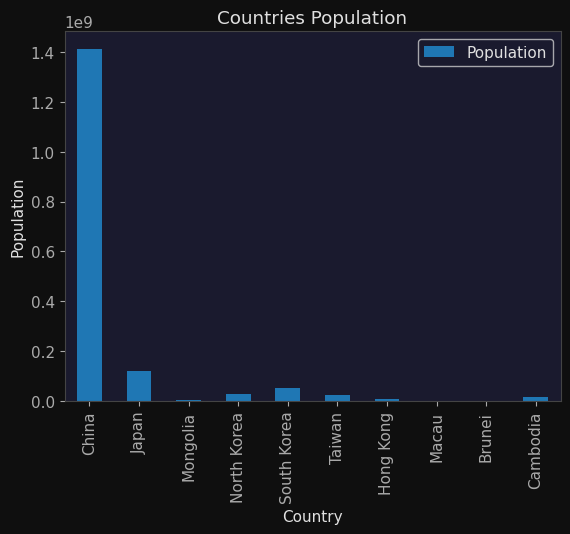

In [44]:
data = df.head(10)
data.plot(kind='bar',x='Country',y='Population')
plt.title('Countries Population')
plt.xlabel('Country')
plt.ylabel('Population')
plt.show()

In [45]:
continent_population = df.groupby('Continent')['Population'].sum()
print(continent_population)

Continent
Africa           1473850000
Antarctica             5000
Asia             4880040000
Australia          27000000
Europe            741512800
North America     596360000
South America     439150000
Name: Population, dtype: int64


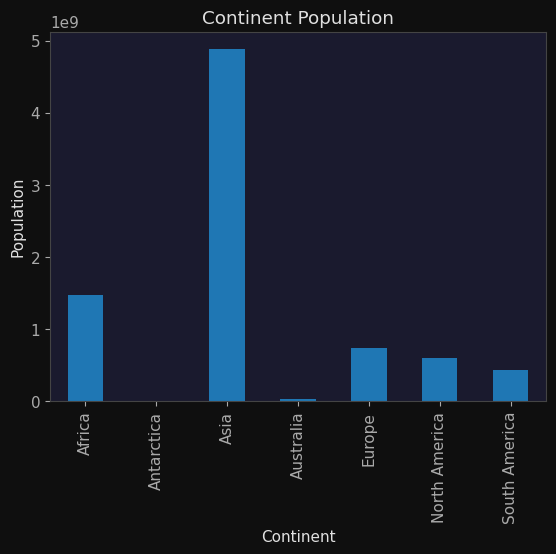

In [46]:
continent_population.plot(kind='bar')
plt.title('Continent Population')
plt.xlabel('Continent')
plt.ylabel('Population')
plt.show() 

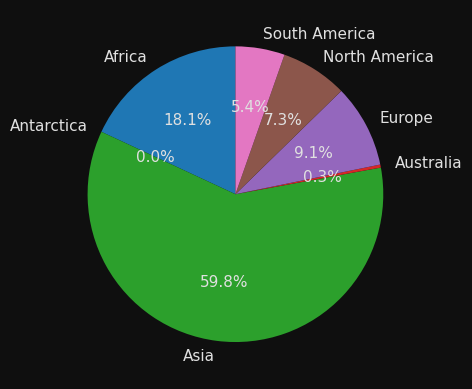

In [47]:
plt.pie(
    continent_population,
    labels=continent_population.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.show()

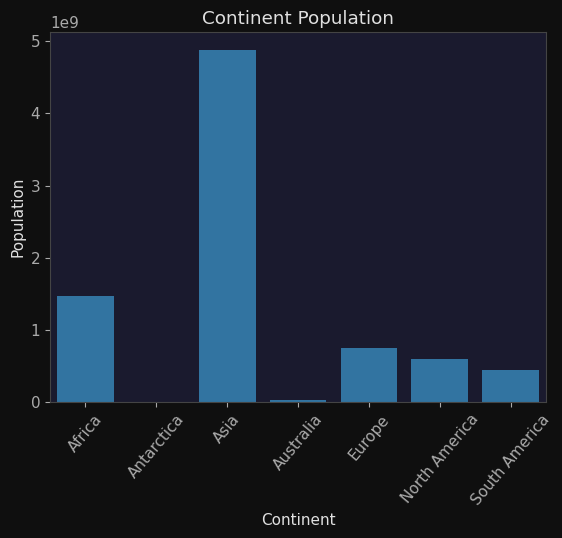

In [50]:
sns.barplot(
    continent_population
)
plt.title('Continent Population')
plt.xticks(rotation=50)
plt.show()

In [61]:
data1 = df.sort_values(by='Population',ascending=False).head(10)
print(data1)

           Country           Capital  Population      Continent  \
22           India         New Delhi  1430000000           Asia   
0            China           Beijing  1412000000           Asia   
128  United States  Washington, D.C.   335000000  North America   
11       Indonesia           Jakarta   276000000           Asia   
25        Pakistan         Islamabad   241000000           Asia   
90         Nigeria             Abuja   227000000         Africa   
131         Brazil         BrasÃ­lia   216000000  South America   
20      Bangladesh             Dhaka   173000000           Asia   
176         Russia            Moscow   146000000         Europe   
51          Russia            Moscow   146000000           Asia   

         Pop_Category  
22      Giant (>200M)  
0       Giant (>200M)  
128     Giant (>200M)  
11      Giant (>200M)  
25      Giant (>200M)  
90      Giant (>200M)  
131     Giant (>200M)  
20   Large (50-200M)   
176  Large (50-200M)   
51   Large (50-200M)  

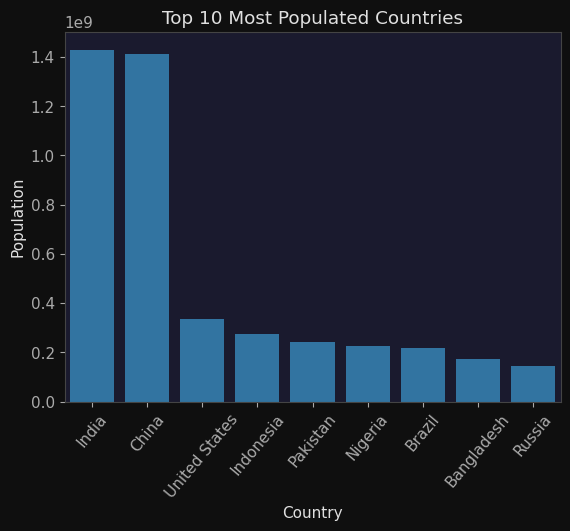

In [62]:
sns.barplot(data1,
            x='Country',
            y='Population')
plt.title('Top 10 Most Populated Countries')
plt.xlabel('Country')
plt.xticks(rotation=50)
plt.ylabel('Population')
plt.show()

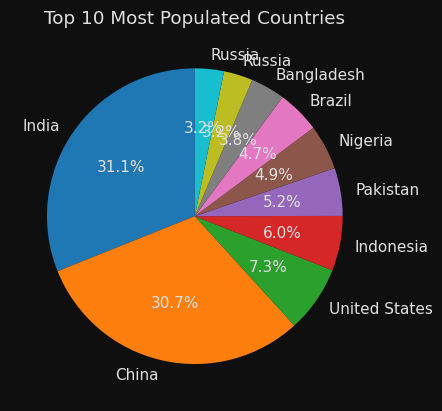

In [64]:
plt.pie(
    data1['Population'],
    labels=data1['Country'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Top 10 Most Populated Countries')
plt.show()